# The ROCKSAMPLE Problem
RockSample, a scalable
problem that models rover science exploration. The rover can achieve reward by sampling rocks in the immediate area, and by continuing its traverse (reaching the exit
at the right side of the map). The positions of the rover
and the rocks are known, but only some of the rocks have
scientific value; we will call these rocks “good”. Sampling
a rock is expensive, so the rover is equipped with a noisy
long-range sensor that it can use to help determine whether
a rock is good before choosing whether to approach and
sample it.

__States__: position of the robot and status of the rocks.

__Actions__: There are 5 basic actions, moving up, down, left, and right, and sampling a rock and $K$ sensing actions to check the state of a rock. When sampling or sensing, the robot does not move.

__Transition model__: When taking a moving action, the robot moves deterministically to the desired cell. The robot can only exit the map by the exit area (on the right side of the grid). Actions that causes the robot to go over the edge of the grid have no effects.

__Observation model__: The robot can observe the status of the rock with some noise when executing a sensing action. The noise varies exponentially with the distance to the rock. The decaying rate is controlled by the parameter sensor_efficiency. If the robot is moving or sampling it does not receive an observation (receives :none).

__Reward model__: The robot receives a positive reward of exit_reward for reaching the exit area. When sampling, the robot receives a reward of good_rock_reward if the sampled rock is good or bad_rock_penalty (negative number) if the rock is bad.


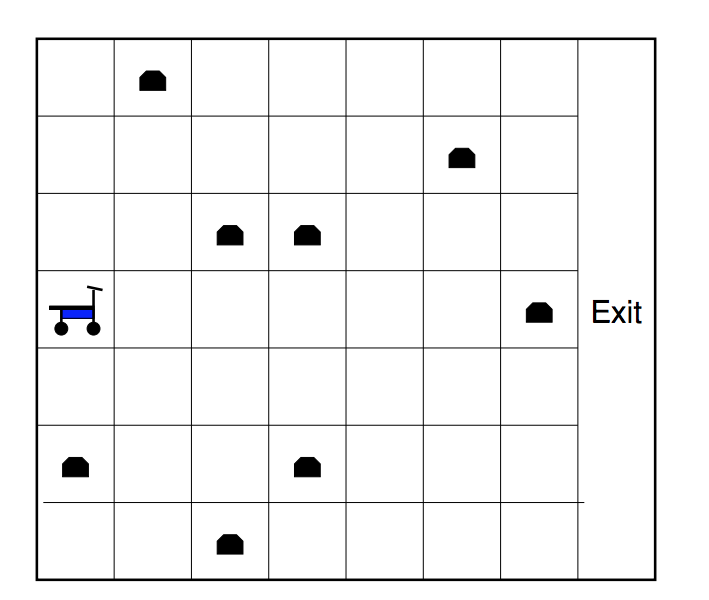

In [1]:
using Pkg
Pkg.add("POMDPSolve")
Pkg.add("FIB")
Pkg.add("POMDPGifs")
Pkg.add("DiscreteValueIteration")
Pkg.add("Fontconfig")
using POMDPSolve
using FIB
using POMDPs
using RockSample 
using SARSOP 
using POMDPGifs 
import Cairo
import Fontconfig

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


g: [========================================>]  100.0 %

   Updating registry at `~/.julia/registries/JuliaPOMDP`
   Updating git-repo `https://github.com/JuliaPOMDP/Registry`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`


In [2]:
pomdp = RockSamplePOMDP(rocks_positions=[(1,1), (4,2), (3,4),(3,3)], 
                        sensor_efficiency=10,
                        discount_factor=0.95, 
                        good_rock_reward = 20.0)

RockSamplePOMDP{4}
  map_size: Tuple{Int64,Int64}
  rocks_positions: StaticArrays.SArray{Tuple{4},StaticArrays.SArray{Tuple{2},Int64,1,2},1,4}
  init_pos: StaticArrays.SArray{Tuple{2},Int64,1,2}
  sensor_efficiency: Float64 10.0
  bad_rock_penalty: Float64 -10.0
  good_rock_reward: Float64 20.0
  exit_reward: Float64 10.0
  terminal_state: RSState{4}
  discount_factor: Float64 0.95


In [3]:
solver1 = SARSOPSolver()
solver2 = FIBSolver()
policy1 = solve(solver1, pomdp)
policy2 = solve(solver2, pomdp)

Generating a pomdpx file: model.pomdpx


┌ Warning: `a::StaticArray + b::Number` is deprecated, use `a .+ b` instead.
│   caller = stateindex(::RockSamplePOMDP{4}, ::RSState{4}) at states.jl:5
└ @ RockSample /Users/ali/.julia/packages/RockSample/zlOBd/src/states.jl:5



Loading the model ...
  input file   : model.pomdpx
  loading time : 0.73s 

SARSOP initializing ...
  initialization time : 0.00s

-------------------------------------------------------------------------------
 Time   |#Trial |#Backup |LBound    |UBound    |Precision  |#Alphas |#Beliefs  
-------------------------------------------------------------------------------
 0       0       0        8.14506    38.5968    30.4517     9        1        
 0.01    3       50       25.6774    36.2042    10.5269     43       24       
 0.02    7       105      31.4828    35.5924    4.10965     81       39       
 0.02    11      155      31.6801    35.1408    3.46064     110      57       
 0.03    14      207      32.9389    35.1083    2.16942     143      76       
 0.04    16      250      32.9389    35.088     2.14909     158      95       
 0.05    19      300      32.9389    34.9091    1.97017     166      109      
 0.06    23      350      32.9389    34.869     1.93007     169      123  

POMDPPolicies.AlphaVectorPolicy{RockSamplePOMDP{4},Int64}(RockSamplePOMDP{4}
  map_size: Tuple{Int64,Int64}
  rocks_positions: StaticArrays.SArray{Tuple{4},StaticArrays.SArray{Tuple{2},Int64,1,2},1,4}
  init_pos: StaticArrays.SArray{Tuple{2},Int64,1,2}
  sensor_efficiency: Float64 10.0
  bad_rock_penalty: Float64 -10.0
  good_rock_reward: Float64 20.0
  exit_reward: Float64 10.0
  terminal_state: RSState{4}
  discount_factor: Float64 0.95
, 401, [[7.737809374999999, 8.1450625, 8.57375, 9.025, 9.5, 7.737809374999999, 8.1450625, 8.57375, 9.025, 9.5  …  60.1305122259535, 63.29527602731948, 60.1305122259535, 57.12398661465583, 57.12398661465583, 60.1305122259535, 63.29527602731948, 60.1305122259535, 57.12398661465583, 0.0], [8.1450625, 8.57375, 9.025, 9.5, 10.0, 8.1450625, 8.57375, 9.025, 9.5, 10.0  …  66.62660634454683, 63.29527602731948, 60.1305122259535, 10.0, 60.1305122259535, 63.29527602731948, 60.1305122259535, 57.12398661465583, 10.0, 0.0], [7.737809374999999, 8.1450625, 8.57375, 9.

In [4]:
sim = GifSimulator(filename="test.gif", max_steps=30)
simulate(sim, pomdp, policy1)

Simulating...100%|██████████████████████████████████████| Time: 0:00:04
Rendering 17 steps...100%|██████████████████████████████| Time: 0:00:04
┌ Info: Creating Gif...
└ @ POMDPGifs /Users/ali/.julia/packages/POMDPGifs/NifU5/src/POMDPGifs.jl:123
┌ Info: Done Creating Gif.
└ @ POMDPGifs /Users/ali/.julia/packages/POMDPGifs/NifU5/src/POMDPGifs.jl:127


POMDPGifs.SavedGif("test.gif")

In [5]:
simulate(sim, pomdp, policy2)

Simulating...100%|██████████████████████████████████████| Time: 0:00:03
Rendering 30 steps...100%|██████████████████████████████| Time: 0:00:01
┌ Info: Creating Gif...
└ @ POMDPGifs /Users/ali/.julia/packages/POMDPGifs/NifU5/src/POMDPGifs.jl:123
┌ Info: Done Creating Gif.
└ @ POMDPGifs /Users/ali/.julia/packages/POMDPGifs/NifU5/src/POMDPGifs.jl:127


POMDPGifs.SavedGif("test.gif")

In [6]:
policy1

POMDPPolicies.AlphaVectorPolicy{RockSamplePOMDP{4},Int64}(RockSamplePOMDP{4}
  map_size: Tuple{Int64,Int64}
  rocks_positions: StaticArrays.SArray{Tuple{4},StaticArrays.SArray{Tuple{2},Int64,1,2},1,4}
  init_pos: StaticArrays.SArray{Tuple{2},Int64,1,2}
  sensor_efficiency: Float64 10.0
  bad_rock_penalty: Float64 -10.0
  good_rock_reward: Float64 20.0
  exit_reward: Float64 10.0
  terminal_state: RSState{4}
  discount_factor: Float64 0.95
, 401, [[-2.26219, 8.14506, 8.57375, 9.025, 9.5, 7.73781, 8.14506, 8.57375, -0.975, 9.5  …  8.14506, 28.5738, 9.025, 9.5, 7.73781, 8.14506, 8.57375, 9.025, 9.5, 0.0], [6.51993, 8.10426, 8.5349, 8.97979, 9.44149, 7.69905, 8.11821, 8.55335, 8.36883, 9.45241  …  7.76466, 26.2614, 8.6035, 9.07259, 7.39858, 7.77861, 8.18392, 8.61896, 9.08351, 0.0], [7.3141, 7.7123, 8.12568, 7.95039, 8.97979, 7.31761, 7.7194, 8.14506, 8.55335, 8.9841  …  7.38968, 7.77472, 8.18801, 8.62934, 7.02865, 7.38968, 7.77472, 8.18801, 8.62934, 0.0], [6.95173, 7.33343, 7.73781, 8.1256

In [7]:
policy2

POMDPPolicies.AlphaVectorPolicy{RockSamplePOMDP{4},Int64}(RockSamplePOMDP{4}
  map_size: Tuple{Int64,Int64}
  rocks_positions: StaticArrays.SArray{Tuple{4},StaticArrays.SArray{Tuple{2},Int64,1,2},1,4}
  init_pos: StaticArrays.SArray{Tuple{2},Int64,1,2}
  sensor_efficiency: Float64 10.0
  bad_rock_penalty: Float64 -10.0
  good_rock_reward: Float64 20.0
  exit_reward: Float64 10.0
  terminal_state: RSState{4}
  discount_factor: Float64 0.95
, 401, [[7.737809374999999, 8.1450625, 8.57375, 9.025, 9.5, 7.737809374999999, 8.1450625, 8.57375, 9.025, 9.5  …  60.1305122259535, 63.29527602731948, 60.1305122259535, 57.12398661465583, 57.12398661465583, 60.1305122259535, 63.29527602731948, 60.1305122259535, 57.12398661465583, 0.0], [8.1450625, 8.57375, 9.025, 9.5, 10.0, 8.1450625, 8.57375, 9.025, 9.5, 10.0  …  66.62660634454683, 63.29527602731948, 60.1305122259535, 10.0, 60.1305122259535, 63.29527602731948, 60.1305122259535, 57.12398661465583, 10.0, 0.0], [7.737809374999999, 8.1450625, 8.57375, 9.